# Team Durchmusterung

Members: Henry Makhanov, Louis Chen, Felix Xu

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from torch import Tensor
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit
from qiskit.utils import algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap

# Set seed for random generators
algorithm_globals.random_seed = 42

In [4]:
!pip install sklearn -q

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('Star3642_balanced.csv')
data

data = data.drop(data[ data['e_Plx'] > data['e_Plx'].quantile(q=0.95)].index)
data

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,8.23,2.72,1.01,1.294,K2/K3III,15.402843,0
1,7.95,6.12,0.97,1.067,K0III-IV,16.883757,1
3,6.93,0.65,0.66,0.240,B0.5III,10.994566,0
4,6.82,2.82,0.74,1.273,G8/K0III,14.071245,0
5,7.85,4.42,1.13,0.168,B8III,16.077110,0
...,...,...,...,...,...,...,...
3637,8.20,9.41,1.53,0.500,F5V,18.067947,1
3638,7.41,0.57,1.03,1.389,K2III,11.189374,0
3639,8.74,1.81,1.25,0.980,G8III,15.028393,0
3640,6.15,2.93,0.82,1.652,M0III,13.484339,0


In [5]:
stars_df_eng = data.copy()

stars_df_eng['Amag_SQ'] = stars_df_eng['Amag']**2
stars_df_eng['Vmag_SQ'] = stars_df_eng['Vmag']**2
stars_df_eng['B-V_SQ'] = stars_df_eng['B-V']**2

# INTERACTION TERMS
stars_df_eng['VmagBV'] = stars_df_eng['Vmag_SQ'] * stars_df_eng['B-V_SQ']
stars_df_eng['VmagPlx'] = stars_df_eng['Vmag_SQ'] * stars_df_eng['e_Plx']
stars_df_eng['BVPlx'] = stars_df_eng['B-V_SQ'] * stars_df_eng['e_Plx']


del stars_df_eng['Amag']
del stars_df_eng['Vmag'] 
del stars_df_eng['B-V']
del stars_df_eng['Plx']
del stars_df_eng['e_Plx']
del stars_df_eng['TargetClass']

In [6]:
letter_to_number = {'W':0, 'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6, 'C':6}

stars_df_eng['Letter'] = stars_df_eng['SpType'].str[0]
stars_df_eng['StarClass'] = stars_df_eng['Letter'].map(letter_to_number)


In [7]:
del stars_df_eng['Letter'] 
del stars_df_eng['SpType'] 

In [8]:
stars_numeric = stars_df_eng

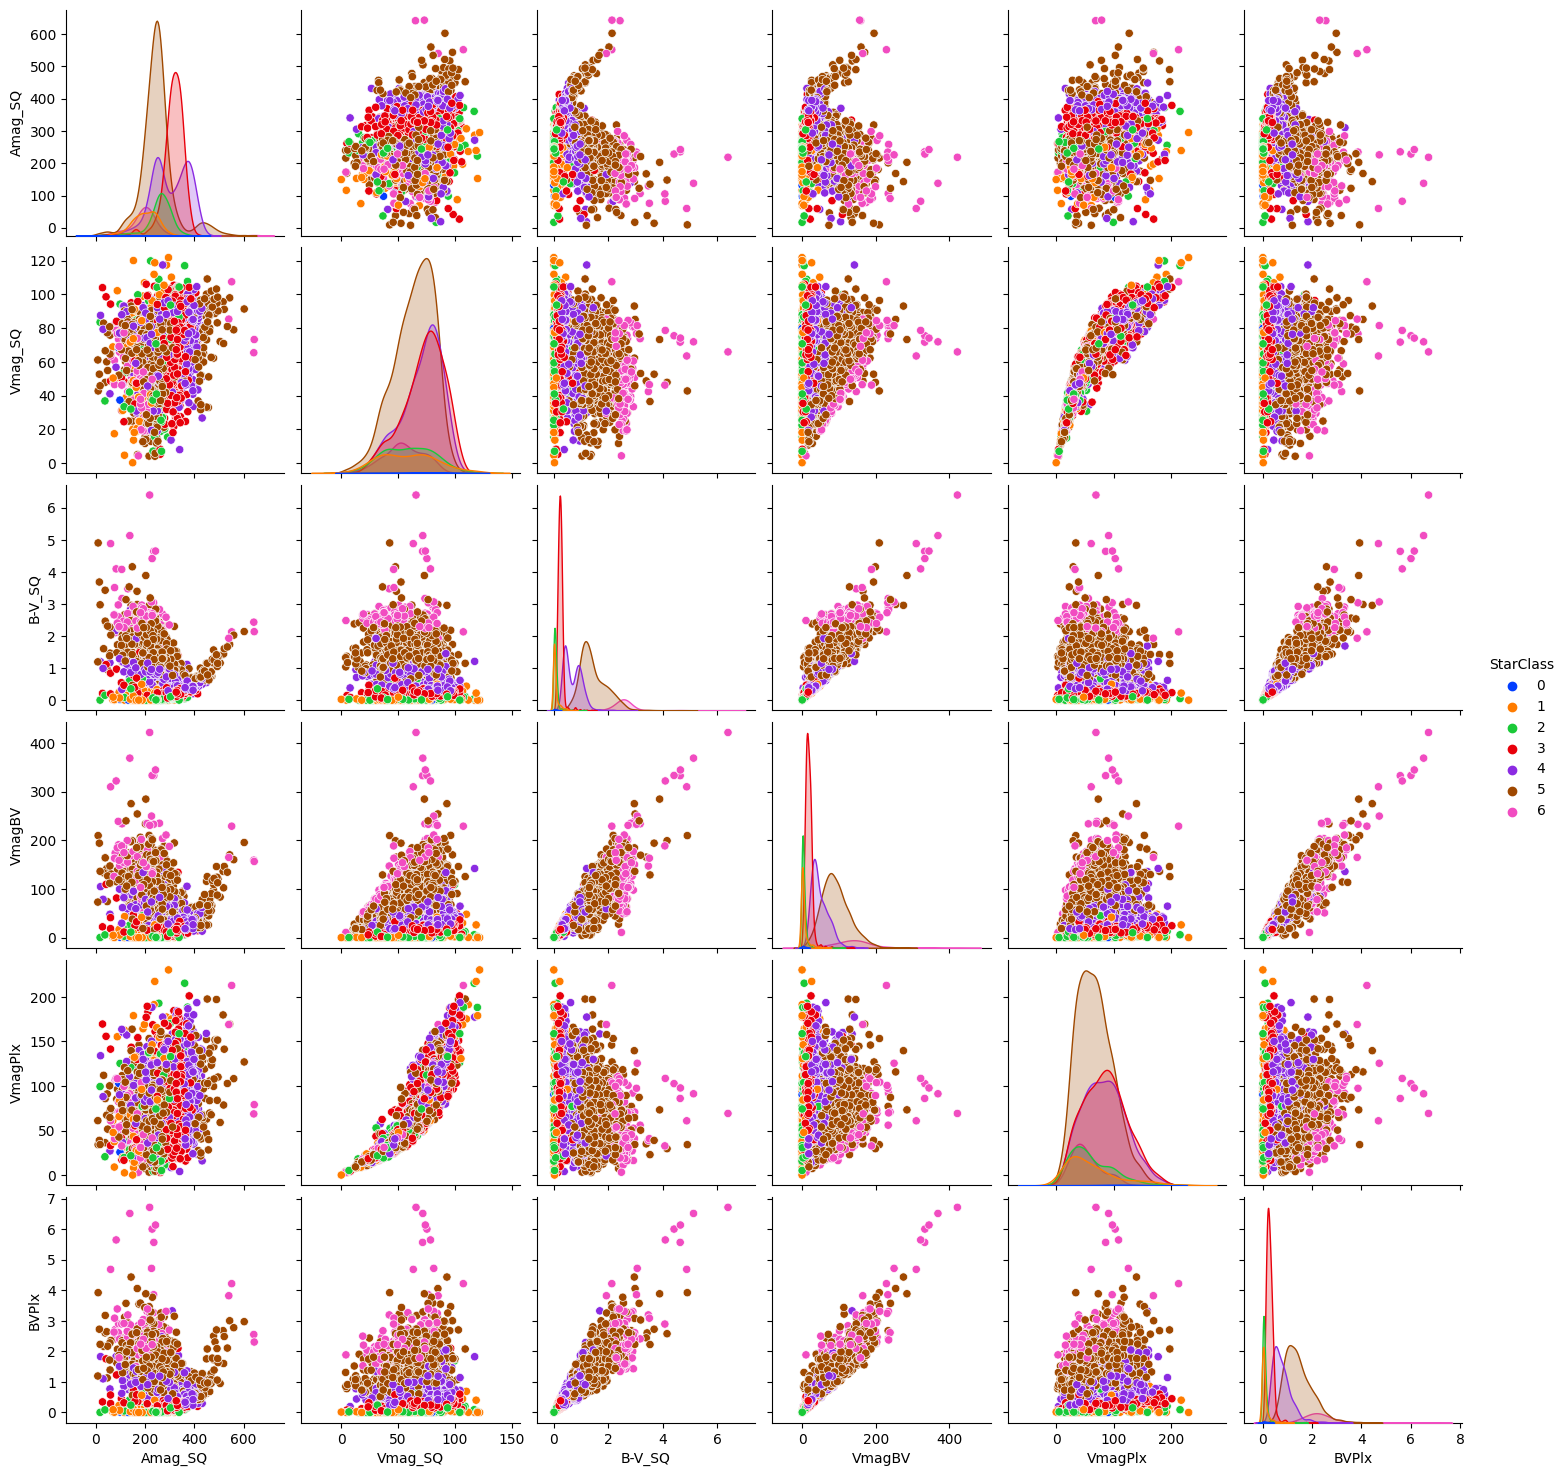

In [9]:
sns.pairplot(stars_numeric,hue='StarClass', palette='bright')
plt.show()

In [10]:
# Train data set
X=np.array(stars_numeric.loc[:,['Amag_SQ','Vmag_SQ','B-V_SQ', 'VmagBV', 'VmagPlx', 'BVPlx']])
Y=np.array(stars_numeric['StarClass'])

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
#Standarization of the dataset
for i in stars_numeric.columns.tolist():
    stars_numeric[i] = stars_numeric[i] / stars_numeric[i].max()
stars_numeric.head()
stars_numeric['StarClass'] = stars_numeric['StarClass'].astype('int64')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, jaccard_score
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Additional torch-related imports
import torch
from torch.autograd import Function
import torch.optim as optim
import torch.nn as nn
from torch import cat, no_grad, manual_seed
from torch.nn import NLLLoss
import torch.nn.functional as F

In [18]:
from qiskit import execute
from qiskit.circuit import Parameter,ControlledGate
from qiskit import Aer
import qiskit
import numpy as np

In [19]:
from tqdm import tqdm

In [26]:
from qiskit.providers.aer import *
import numpy as np
np.random.seed = 42

NUM_QUBITS = 3
NUM_SHOTS = 3000
SHIFT = np.pi/4
LEARNING_RATE = 0.01
MOMENTUM = 0.5

SIMULATOR = AerSimulator(method='statevector')#, device='GPU', cuStateVec_enable=False)

In [27]:

# create list of all possible outputs of quantum circuit (2**NUM_QUBITS possible)
import itertools
def create_QC_OUTPUTS():
    measurements = list(itertools.product([0, 1], repeat=NUM_QUBITS))
    return [''.join([str(bit) for bit in measurement]) for measurement in measurements]

QC_OUTPUTS = create_QC_OUTPUTS()
print(QC_OUTPUTS)

['000', '001', '010', '011', '100', '101', '110', '111']


In [28]:
class QiskitCircuit():
    
    def __init__(self, n_qubits, backend, shots):
        # --- Circuit definition ---
        self.circuit = qiskit.QuantumCircuit(n_qubits)
        self.n_qubits = n_qubits
        self.thetas ={k : Parameter('Theta'+str(k))for k in range(self.n_qubits)}
        
        all_qubits = [i for i in range(n_qubits)]
        self.circuit.h(all_qubits)
        self.circuit.barrier()
        for k in range(n_qubits):
            self.circuit.ry(self.thetas[k], k)
        
#         # Apply controlled-unitary
# #         uc=ry(self.theta4, 4).to_gate().control(4)
# #         self.circuit.append(uc, [0,1,2,3,4])
#         self.circuit.ry(self.theta4, 4).to_gate().control(4)

        self.circuit.measure_all()
        # ---------------------------
        
        self.backend = backend
        self.shots = shots
        
#             check = perc
#             for i in range(nr_qubits):
#                 check *= (float(key[i])-1/2)*2
#             expects += check   
        
    def N_qubit_expectation_Z(self,counts, shots, nr_qubits):
        expects = np.zeros(len(QC_OUTPUTS))
        for k in range(len(QC_OUTPUTS)):
            key = QC_OUTPUTS[k]
            perc = counts.get(key, 0) /shots
            expects[k] = perc
        return expects
    
    def run(self, i):
        params = i
#         print('params = {}'.format(len(params)))
        backend = Aer.get_backend('qasm_simulator')
        circ = self.circuit
        circ = circ.bind_parameters({self.thetas[k] : params[k].item() for k in range(NUM_QUBITS)})
        job_sim = execute(circ,
                              self.backend,
                              shots=self.shots, cuStateVec_enable=False)
        result_sim = job_sim.result()
        counts = result_sim.get_counts()
        return self.N_qubit_expectation_Z(counts,self.shots,NUM_QUBITS)

In [29]:
circuit = QiskitCircuit(NUM_QUBITS, SIMULATOR, NUM_SHOTS)
print('Expected value for rotation [pi/4]: {}'.format(circuit.run(torch.Tensor([np.pi/4]*NUM_QUBITS))))

Expected value for rotation [pi/4]: [0.00266667 0.018      0.01666667 0.104      0.01366667 0.10266667
 0.10466667 0.63766667]


In [30]:
class TorchCircuit(Function):    

    @staticmethod
    def forward(ctx, i):
        if not hasattr(ctx, 'QiskitCirc'):
            ctx.QiskitCirc = QiskitCircuit(NUM_QUBITS, SIMULATOR, shots=NUM_SHOTS)
            
        exp_value = ctx.QiskitCirc.run(i)
        
        result = torch.tensor([exp_value])
        
        
        ctx.save_for_backward(result, i)
        
        return result
    
    @staticmethod
    def backward(ctx, grad_output):
        
        forward_tensor, i = ctx.saved_tensors
#         print('forward_tensor = {}'.format(forward_tensor))
        input_numbers = i
#         print('input_numbers = {}'.format(input_numbers))
        gradients = torch.Tensor()
        
        for k in range(NUM_QUBITS):
            shift_right = input_numbers.detach().clone()
            shift_right[k] = shift_right[k] + SHIFT
            shift_left = input_numbers.detach().clone()
            shift_left[k] = shift_left[k] - SHIFT
            
#             print('shift_right = {}, shift_left = {}'.format(shift_right, shift_left))
            
            expectation_right = ctx.QiskitCirc.run(shift_right)
            expectation_left  = ctx.QiskitCirc.run(shift_left)
#             print('expectation_right = {}, \nexpectation_left = {}'.format(expectation_right, expectation_left))
            
            gradient = torch.tensor([expectation_right]) - torch.tensor([expectation_left])
            # rescale gradient
#             gradient = gradient / torch.norm(gradient)
#             print('gradient for k={}: {}'.format(k, gradient))
            gradients = torch.cat((gradients, gradient.float()))
            
        result = torch.Tensor(gradients)
#         print('gradients = {}'.format(result))
#         print('grad_output = {}'.format(grad_output))

        return (result.float() * grad_output.float()).T    

In [44]:
import torch.nn as nn
from torch import cuda

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=2)
        self.pool1 = nn.MaxPool1d(kernel_size=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=2)
        self.pool2 = nn.MaxPool1d(kernel_size=1)
        self.fc1 = nn.Linear(128, 50)
        self.fc2 = nn.Linear(50, NUM_QUBITS)
        self.qc = TorchCircuit.apply
        self.qcsim = nn.Linear(NUM_QUBITS, 1)
        self.fc3 = nn.Linear(1, 4)

    def forward(self, x):
        x = x.unsqueeze(0).unsqueeze(0)  # reshape the input tensor
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)        
        x = F.relu(x)
        x = self.fc2(x)
        
#         print('params to QC: {}'.format(x))

        MODE = 'QC' # 'QC' or 'QC_sim'
    
        if MODE == 'QC': 
            x = qc(x[0]) # QUANTUM LAYER
        
        else:
            x = self.qcsim(x)
            
#         print('output of QC = {}'.format(x))
        
#         # softmax rather than sigmoid
#         x = self.fc3(x.float())
#         print('output of Linear(1, 2): {}'.format(x))
#         x = F.softmax(x, 1)
        if cuda.is_available():
            device = torch.device("cuda")
        else:
            device = torch.device("cpu")
        x = torch.sigmoid(x)
        x = torch.cat((x, 1-x), -1)
#         print(x)
        return x
    
    
    def predict(self, x):
        # apply softmax
        pred = self.forward(x)
#         print(pred)
        ans = torch.argmax(pred[0]).item()
        return ans

In [45]:
import torch

# define input tensor
input_tensor = torch.tensor([0.6821, 0.7400, 0.1285, 0.1759, 0.5169, 0.1616]).float()

# instantiate the model
model = Net()

# pass input tensor through the model
output = model(input_tensor)

# print output tensor
print(output)

tensor([[0.5331, 0.5353, 0.5339, 0.5346, 0.5306, 0.5247, 0.5290, 0.5285, 0.4669,
         0.4647, 0.4661, 0.4654, 0.4694, 0.4753, 0.4710, 0.4715]],
       dtype=torch.float64, grad_fn=<CatBackward0>)


In [46]:
network = Net()

In [53]:
# Define model, optimizer, and loss function
network = Net()
optimizer = optim.Adam(network.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

network.train()  # Set model to training mode
epochs = 10

loss_list = []
acc_list = []
for epoch in range(epochs):
    total_loss = 0.0
    total_correct = 0
    
    for i in range(len(X_train)):
        # Get the current input and target
        data = Tensor(X_train[i])
        target = Tensor([Y_train[i]]).long()  # convert target to LongTensor
        
        optimizer.zero_grad()        
        # Forward pass
        output = network(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(output.data, 1)
        total_correct += (predicted == target).sum().item()
        
    loss_list.append(total_loss / len(X_train))
    acc_list.append(total_correct / len(X_train))
    
    print('Training [{:.0f}%]\tLoss: {:.4f}\tAccuracy: {:.2%}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1], acc_list[-1]))


Training [10%]	Loss: 2.7431	Accuracy: 12.57%
Training [20%]	Loss: 2.7418	Accuracy: 12.68%
Training [30%]	Loss: 2.7420	Accuracy: 13.73%
